## Cache Plots

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import seaborn as sns

PHYSICAL_CORES=64

def plot(p_data, p_yId, p_xId, p_hueId, p_styleId, p_logScale=False, p_core_marker=False):
    rcParams['figure.figsize'] = 11.7,8.27
    plot = sns.lineplot(x=p_xId,
                        y=p_yId,
                        hue=p_hueId,
                        style=p_styleId,
                        data=p_data)
    if p_logScale == True:
        plot.set_yscale('log')
        plot.set_xscale('log')
    plot.set(xlabel='threads', ylabel=p_yId)
    plt.grid(True,which="both",ls="--",c='lightgray') 

    if(p_core_marker == True):
        plt.axvline(64, linestyle='--', color='red')

    plt.figure(figsize=(1, 1), dpi=80)
    plt.show()

### Gauss3

#### Efficiency

/var/folders/zt/h71khkbd7ll9krscx1zncwlc0000gn/T/ipykernel_15414/1189243165.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ref_runtime = data_frame_copy[data_frame.solver_id == 'cg_b7'][data_frame.threads == 1]['runtime'].values[0]


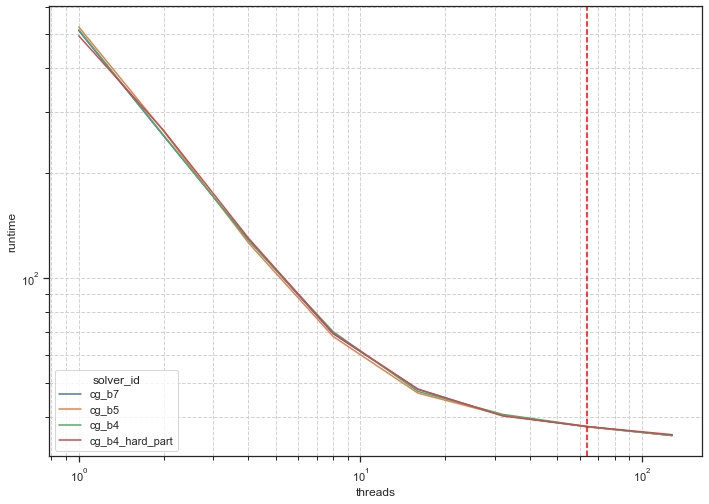

<Figure size 80x80 with 0 Axes>

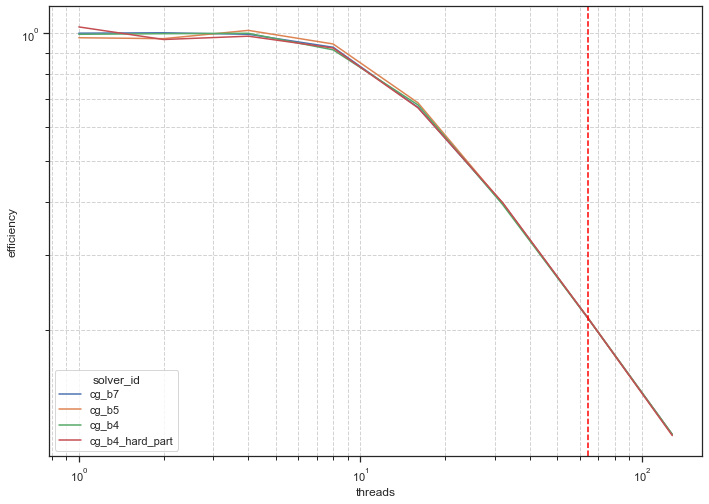

<Figure size 80x80 with 0 Axes>

In [2]:
import pandas as pd
import seaborn as sns

sns.set_theme()
sns.set_style("ticks")

data_frame = pd.read_csv('./e_efficiency.csv')
data_frame = data_frame[data_frame.region_id == 'apply']
data_frame['efficiency_type'] = 'relative'

#
# NOTE: calc absolute efficiency
#
data_frame_copy = data_frame.copy()
data_frame_copy['efficiency_type'] = 'absolute'
ref_runtime = data_frame_copy[data_frame.solver_id == 'cg_b7'][data_frame.threads == 1]['runtime'].values[0]
data_frame_copy['efficiency']=data_frame_copy.apply(lambda row: ref_runtime/(row['runtime'] * row['threads']), axis=1)

data_frame = data_frame_copy.append(data_frame)
data_frame = data_frame[data_frame.efficiency_type == 'absolute']

# display(data_frame)

plot(p_data=data_frame,
    p_yId='runtime',
    p_xId='threads',
    p_hueId='solver_id',
    p_styleId=None,
    p_logScale=True,
    p_core_marker=True)
plot(p_data=data_frame,
    p_yId='efficiency',
    p_xId='threads',
    p_hueId='solver_id',
    # p_styleId='efficiency_type',
    p_styleId=None,
    p_logScale=True,
    p_core_marker=True)